<a href="https://colab.research.google.com/github/JesseK18/NaCo1/blob/Jesse/NACO1colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install "geopandas<1.0.0" numpy matplotlib pandas svgpath2mpl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 1.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 21.4 MB/s eta 0:00:00
  Attempting uninstall: geopandas
    Found existing installation: geopandas 1.0.1
    Uninstalling geopandas-1.0.1:
      Successfully uninstalled geopandas-1.0.1


27046.14386995663
26149.89343217605


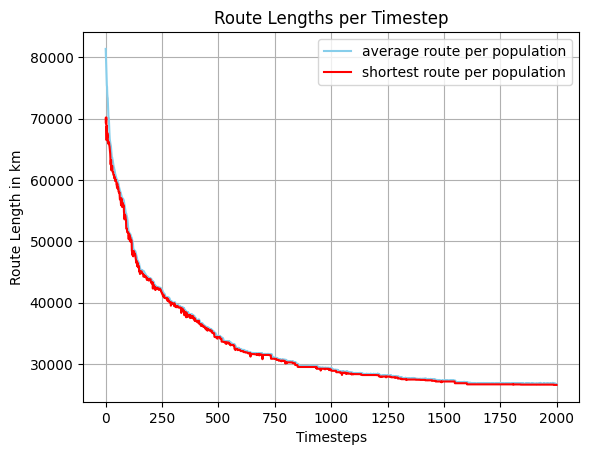

In [21]:
"""README

This file contains all the code needed the assignment 1 for the Natural Computing
course 24/25. Please see the example at the bottom of this file on how to interact
with the TSP object.

Installation
------------
    Call this in a terminal:
        pip install "geopandas<1.0.0" numpy matplotlib pandas svgpath2mpl

"""

import warnings
import math
import io
import typing

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import svgpath2mpl
import geopandas


DATA = """hckey,capital,capital_lat,capital_lng
ad,Andorra,42.5,1.5165
al,Tirana,41.3275,19.8189
at,Vienna,48.2,16.3666
ba,Sarajevo,43.85,18.383
be,Brussels,50.8333,4.3333
bg,Sofia,42.6833,23.3167
by,Minsk,53.9,27.5666
ch,Bern,46.9167,7.467
cy,Nicosia,35.1667,33.3666
cz,Prague,50.0833,14.466
de,Berlin,52.5218,13.4015
dk,Copenhagen,55.6786,12.5635
ee,Tallinn,59.4339,24.728
es,Madrid,40.4,-3.6834
fi,Helsinki,60.1756,24.9341
fr,Paris,48.8667,2.3333
gb,London,51.5072,-0.1275
gr,Athens,37.9833,23.7333
hr,Zagreb,45.8,16
hu,Budapest,47.5,19.0833
ie,Dublin,53.3331,-6.2489
is,Reykjavik,64.15,-21.95
it,Rome,41.896,12.4833
li,Vaduz,47.1337,9.5167
lt,Vilnius,54.6834,25.3166
lu,Luxembourg,49.6117,6.13
lv,Riga,56.95,24.1
mc,Monaco,43.7396,7.4069
md,Chisinau,47.005,28.8577
me,Podgorica,42.466,19.2663
mk,Skopje,42,21.4335
mt,Valletta,35.8997,14.5147
nl,Amsterdam,52.35,4.9166
no,Oslo,59.9167,10.75
pl,Warsaw,52.25,21
pt,Lisbon,38.7227,-9.1449
ro,Bucharest,44.4334,26.0999
rs,Belgrade,44.8186,20.468
ru,Moscow,55.7522,37.6155
se,Stockholm,59.3508,18.0973
si,Ljubljana,46.0553,14.515
sk,Bratislava,48.15,17.117
sm,San Marino,43.9172,12.4667
ua,Kiev,50.4334,30.5166"""

LEIDEN_SVG = """M380.52 239.51l-30.679-29.744-29.757-34.948-14.23-13.797v-13.258l-33.266-32.255-10.352 10.033-7.763-7.524-10.348 10.034 5.917 5.734-17.746
17.203-14.047-13.62 10.721-10.395-10.351-10.033-10.718 10.395-12.197-11.827 10.717-10.395-11.452-11.107-10.721 10.391-16.266-15.767
2.957-2.868 18.481-17.918 11.46 11.107 9.982-9.675-6.656-6.45 17.004-16.488-6.653-6.45 14.416-13.978 120.868 117.197
29.754 31.71v18.457L403.9 216.84h20.608c2.352 0 8.24-8.424 10.436-10.142 6.777-5.306 13.24-4.346 21.31-3.43 13.316 1.514 23.955
9.485 33.313 18.203 26.695 24.87 21.382 53.31.735 79.32.788-.988 7.349 10.174 7.555 11.301.79 4.372-.726 9.239-3.29 12.907-5.464
7.82-15.208 8.218-24.226 8.231l-6.744-6.542c-11.747 11.39-16.922 16.034-33.659 16.037-31.782.003-53.845-10.81-66.787-40.495v-25.804l4.434-12.904
12.936-12.543V239.51zm65.036 69.75c27.483-15.113 49.34-48.926 26.594-70.203-11.619-10.87-22.464-10.176-36.766-4.208-.032 0 .252
30.598-4.734 30.598l-5.029 4.879-29.907.402c-14.831 14.377-7.986 36.849 11.629 44.275 11.318 4.286 25.378 1.311 38.213-5.744zm55.91
13.359l-5.166-10.18 5.166 10.18zm-298.33-6.814l-3.457 6.814 3.458-6.814a14.054 14.054 0 0 0 1.152-3.714c.206-1.127
6.767-12.289 7.555-11.3-20.647-26.01-25.96-54.45.735-79.32 9.358-8.72 19.997-16.69 33.312-18.205 8.07-.915 14.534-1.875
21.31 3.431 2.197 1.718 8.085 10.142 10.437 10.142h20.608l24.304-23.565v-18.457l29.754-31.71L472.172 25.91l14.416
13.978-6.653 6.45 17.004 16.487-6.656 6.45 9.983 9.676 11.459-11.107 18.48 17.918 2.958 2.868-16.266 15.767-10.72-10.391-11.453
11.107 10.717 10.395-12.197 11.827-10.718-10.395-10.351 10.033 10.72 10.395-14.046 13.62-17.746-17.203 5.917-5.734-10.348-10.034-7.763
7.524-10.352-10.033-33.266 32.255v13.258l-14.23 13.797-29.757 34.948-30.679 29.744v11.468l12.936 12.543 4.434 12.904v25.804c-12.942
29.685-35.004 40.498-66.787 40.495-16.737-.003-21.912-4.648-33.659-16.037l-6.744 6.542c-9.018-.013-18.762-.412-24.225-8.23-1.854-2.652-3.16-5.93-3.443-9.194zm293.125-3.444L490.491
301l5.77 11.36zm-240.672-3.102c12.835 7.055 26.895 10.03 38.213 5.744 19.615-7.426 26.46-29.898 11.63-44.275l-29.908-.402-5.029-4.879c-4.986
0-4.702-30.598-4.734-30.598-14.302-5.968-25.147-6.662-36.766 4.208-22.745 21.277-.889 55.09 26.594 70.202z
"""
LEIDEN = 4.497010, 52.160114


def plot_europe(
    data: pd.DataFrame, fig: plt.Figure = None, ax: plt.Axes = None
) -> typing.Tuple[plt.Figure, plt.Axes]:
    """Plotting utilitly, plots a map of Europe, with Leiden explitly marked

    Parameters
    ----------
    data: pd.DataFrame
        Locations of cities on the map

    fig: mpl.Figure (optional)
    ax: plt.Axes (optional)
        Optional figure and axes for plotting

    Returns
    -------
        (mpl.Figure, plt.Axes,)
            Handles to the plot
    """

    if fig is None:
        fig, ax = plt.subplots(1, 1, figsize=(15, 8))

    keys = svgpath2mpl.parse_path(LEIDEN_SVG)
    keys.vertices -= keys.vertices.mean(axis=0)

    keys = keys.transformed(mpl.transforms.Affine2D().rotate_deg(180))

    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        world = geopandas.read_file(geopandas.datasets.get_path("naturalearth_lowres"))

    world.plot(ax=ax, color="lightgray", edgecolor="black", alpha=0.5)

    ax.scatter(data["capital_lng"], data["capital_lat"], s=10, color="blue", alpha=0.5)

    ax.scatter(*LEIDEN, color="red", marker=keys, s=5_000, alpha=0.6)
    ax.scatter(*LEIDEN, color="red")
    ax.text(*LEIDEN, "Leiden", ha="right", **{"fontsize": 11})

    for _, c in data.iterrows():
        ax.text(c["capital_lng"], c["capital_lat"], c["capital"], **{"fontsize": 10})

    ax.set_xlim(-24, 40)
    ax.set_ylim(34, 70)
    plt.tight_layout()
    return fig, ax


def haversine(lat1: float, lon1: float, lat2: float, lon2: float) -> float:
    """
    Calculate the great circle distance in kilometers between two points
    on the earth (specified in decimal degrees)

    Parameters
    ----------
    lat1: float
        Latitude for point 1
    lon1: float
        Longtitude for point 1
    lat2: float
        Latitude for point 2
    lon2: float
        Longtitude for point 1

    Returns
    -------
        float
            The Haversine distance between point1 and point 2
    """

    lon1, lat1, lon2, lat2 = map(math.radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = (
        math.sin(dlat / 2) ** 2
        + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2) ** 2
    )
    c = 2 * math.asin(math.sqrt(a))
    r = 6371
    return c * r


class TSP:
    """Traveling Salesperson object, with plotting utility"""

    def __init__(self, plot: bool = True): # turn True for visualisation
        """Create a Traveling Salesperson object

        Parameters
        ----------
        plot: bool = True
            Whether to create an (interactive) plot. When running this for the optimization
            its advised to turn this off, as it can take quite a bit of extra time to visualize
            the tour on every function call.
        """

        self.data = pd.read_csv(io.StringIO(DATA))
        self.plot = plot
        self.line = None
        self.dim = len(self.data)

    def __enter__(self):
        """Create a plot, i.e. figure and axes, if self.plot == True."""

        if self.plot:
            plt.ion()
            _, self.ax = plot_europe(self.data)
        return self

    def __exit__(self, *args, **kwargs):
        """Stop plotting interactively, but keep showing the plot if self.plot == True."""

        if self.plot:
            plt.ioff()
            plt.show()

    def __call__(self, path_idx: np.array) -> float:
        """Calculate the route length of the TSP problem.
        The method returns the total length of the tour, as given by the order specified
        by path_idx, caculated as the sucessive Haversine distance between cities.

        Parameters
        ----------
        path_idx: np.ndarray[int]
            Indices of the cities you will visit, i.e. the order. This should be an integer
            array of size n, where n is the number of cities. Every integer from 1 to n
            should appear in this array, in arbitrary order, but no duplicates are allowed.

        Returns
        -------
            float The length of the tour
        """
        assert len(path_idx) == len(self.data), "Make sure you visit all cities"
        assert len(set(path_idx)) == len(path_idx), "Make sure all cities are unique"

        path = self.create_path(path_idx)

        current = path[0]
        route_length = 0

        for stop in path[1:]:
            route_length += haversine(*current, *stop)
            current = stop

        return route_length

    def create_path(self, path_idx: np.ndarray) -> np.ndarray:
        """Convert an integer path to a matrix of lng, lat values, with Leiden pre- and appended"""

        return np.vstack(
            [
                LEIDEN,
                self.data.iloc[path_idx][["capital_lng", "capital_lat"]].values,
                LEIDEN,
            ]
        )

    def plot_route(self, path: np.ndarray, route_length: float = float("inf")) -> None:
        """Plot the route on the map of Europe, interactively.

        Parameters
        ----------
        path: np.ndarray
            The path of the TSP, can be either a list of indices, or a matrix
            of lng, lat values.
        route_length: float = inf (optional)
            The length of the route, to display in the plot, optional.

        """
        if self.plot:
            if len(path.shape) == 1:
                path = self.create_path(path)

            if self.line is not None:
                self.line[0].remove()
                self.legend.remove()

            self.line = self.ax.plot(
                path[:, 0],
                path[:, 1],
                color="green",
                linestyle="--",
                alpha=0.9,
                label=f"route length: {route_length:.2f} km",
            )
            self.legend = plt.legend()
            plt.draw()
            plt.pause(0.0001)

class GA:
    """Genetic Algorithm experiment and plot"""

    def __init__(self, tsp: TSP, POPULATION_SIZE=100, base_mutation_rate=0.1, increase_rate=0.05, decrease_rate=0.01):
        self.POPULATION_SIZE = POPULATION_SIZE
        self.POPULATION = np.array([np.random.permutation(tsp.dim) for _ in range(self.POPULATION_SIZE)])
        self.tsp = tsp
        self.base_mutation_rate = base_mutation_rate
        self.mutation_rate = base_mutation_rate
        self.increase_rate = increase_rate
        self.decrease_rate = decrease_rate
        self.no_improvement_count = 0
        self.best_fitness = float('inf')
        self.MUTATION_TYPE = ['insert_mutation', 'swap_mutation', 'inversion_mutation', 'scramble_mutation']


    # Evaluating all routes, lengths of all total path lengths
    def evaluate(self, population):
        fitness_scores = np.array([tsp(chromosome) for chromosome in population])
        # self.fitness_scores = fitness_scores
        return fitness_scores

    # Selection by direct comparison of two routes, only shorter route selected to parents
    def selection(self, fitness_scores, population, Q=2, REPETITIONS=50): #Increase Q to have more exploitation maybe?
        '''Function for Tournament Selection'''

        parents = []

        for n in range(REPETITIONS):
            tournament_selection_idx = np.random.choice(np.arange(len(population)), Q, replace=False) # maybe replace = True
            tournament_winner = tournament_selection_idx[np.argmin(fitness_scores[tournament_selection_idx])]
            parents.append(population[tournament_winner])
        return parents

    # Combines all parents randomly to create children according to cycle_cross_over
    def cross_over(self, parents, C_O_RATE=.7):

        offspring = []
        n_iterations = len(parents)

        for _ in range(n_iterations//2):
            parent1_idx, parent2_idx = np.random.choice(n_iterations, 2, replace=False) # maybe set to true...increases convergence
            parent1 = parents[parent1_idx]
            parent2 = parents[parent2_idx]

            child1, child2 = self.cycle_cross_over(parent1, parent2)
            offspring.append(child1)
            offspring.append(child2)

        return offspring

    # Creates children from parents while maintaining completeness of genes
    def cycle_cross_over(self, parent1, parent2):
        # TODO: Handle if no cycles -> order cross over
        size = len(parent1)
        child1 = np.full(size, -1)
        child2 = np.full(size, -1)

        visited = np.zeros(size, dtype=bool)

        gen_p1 = parent1[0]
        stop_gen = parent1[0]
        cycle = [0]
        while True:
            gen_p2_idx = np.where(parent2 == gen_p1)[0][0]
            cycle.append(gen_p2_idx)
            gen_p1 = parent1[gen_p2_idx]
            if gen_p1 == stop_gen:
                break
        child1[cycle] = parent1[cycle]
        child2[cycle] = parent2[cycle]

        child1[child1 < 0] = parent2[child1 < 0]
        child2[child2 < 0] = parent1[child2 < 0]

        return child1, child2

    def mutations(self, population, mutation_rate=.1, mutation='all'): #or specific mutation
        mutated_population = []
        copy_population = np.copy(population)

        num_mutations = int(len(population) * mutation_rate)
        mutation_indices = np.random.choice(copy_population.shape[0], num_mutations, replace=False)
        mutation_pool = copy_population[mutation_indices]
        mutation_probabilities = [0.3, 0.1, 0.5, 0.1]
        if mutation == 'all':
          for chromosome in mutation_pool:
              mutation = np.random.choice(self.MUTATION_TYPE, p=mutation_probabilities)

              if mutation == 'insert_mutation':
                  mutant = self.insert_mutation(chromosome)

              elif mutation == 'swap_mutation':
                  mutant = self.swap_mutation(chromosome)

              elif mutation == 'scramble_mutation':
                  mutant = self.swap_mutation(chromosome)

              else:
                  mutant = self.inversion_mutation(chromosome)

              mutated_population.append(mutant)

        else:

          if mutation == 'insert_mutation':
              for chromosome in mutation_pool:
                mutant = self.insert_mutation(chromosome)
                mutated_population.append(mutant)

          elif mutation == 'swap_mutation':
              for chromosome in mutation_pool:
                mutant = self.swap_mutation(chromosome)
                mutated_population.append(mutant)

          elif mutation == 'scramble_mutation':
              for chromosome in mutation_pool:
                mutant = self.swap_mutation(chromosome)
                mutated_population.append(mutant)

          else:
              for chromosome in mutation_pool:
                mutant = self.inversion_mutation(chromosome)
                mutated_population.append(mutant)

        return mutated_population





    def adaptive_mutation(self, population):
        # track best route
        current_best_fitness = np.min(self.evaluate(population))
        if current_best_fitness < self.best_fitness:
            # improvement update
            self.no_improvement_count = 0
            self.best_fitness = current_best_fitness
            # so, mutation rate should be slowed down slightly bcs correct momentum
            self.mutation_rate = max(self.base_mutation_rate, self.mutation_rate - self.decrease_rate)
        else:
            # no improvement update
            self.no_improvement_count += 1
            if self.no_improvement_count >= 5: # vary for slower\faster increase
                self.mutation_rate = min(1.0, self.mutation_rate + self.increase_rate)

        # apply normal mutations
        mutated_population = []
        copy_population = np.copy(population)
        num_mutations = int(len(population) * self.mutation_rate)
        population = np.array(population) if isinstance(population, list) else population

        # Number of mutations
        num_mutations = min(max(1, num_mutations), len(population))
        mutation_indices = np.random.choice(copy_population.shape[0], num_mutations, replace=False)
        mutation_pool = population[mutation_indices]
        mutation_probabilities = [0.3, 0.1, 0.5, 0.1] # probabilities for selction, insert, inversion mostly
        for chromosome in mutation_pool:
            mutation = np.random.choice(self.MUTATION_TYPE, p=mutation_probabilities)
            if mutation == 'insert_mutation':
                mutant = self.insert_mutation(chromosome)
            elif mutation == 'swap_mutation':
                mutant = self.swap_mutation(chromosome)
            elif mutation == 'scramble_mutation':
                mutant = self.swap_mutation(chromosome)
            else:
                mutant = self.inversion_mutation(chromosome)
            mutated_population.append(mutant)

        return mutated_population





    def insert_mutation(self, chromosome:np.array):
        gen1, gen2 = np.random.choice(np.arange(len(chromosome)), 2, replace=False) # creates copy to not accidently remove a dimension

        mask = chromosome != gen2
        new_chromosome = chromosome[mask]

        index_gen1 = np.where(new_chromosome == gen1)[0][0]

        new_chromosome = np.insert(new_chromosome, index_gen1, gen2)

        return new_chromosome

    def swap_mutation(self, chromosome:np.array):
        idx_1, idx_2 = np.random.choice(np.arange(len(chromosome)), 2, replace=False) # creates copy to not accidently remove a dimension
        new_chromosome = np.copy(chromosome)
        new_chromosome[idx_1] = chromosome[idx_2]
        new_chromosome[idx_2] = chromosome[idx_1]

        return new_chromosome

    def inversion_mutation(self, chromosome:np.array):
        idx_1, idx_2 = np.random.choice(np.arange(len(chromosome)), 2, replace=False)
        new_chromosome = np.copy(chromosome)

        split1 = np.min((idx_1, idx_2))
        split2 = np.max((idx_1, idx_2))

        reversed_sequence = chromosome[split1:split2+1][::-1] # +1 to ensure a minimum sequence of 2
        new_chromosome[split1:split2+1] = reversed_sequence

        return new_chromosome

    def scramble_mutation(self, chromosome: np.array):
        idx_1, idx_2 = np.random.choice(np.arange(len(chromosome)), 2, replace=False)
        start, end = min(idx_1, idx_2), max(idx_1, idx_2)
        # Scramble the segment
        scrambled_segment = np.random.permutation(chromosome[start:end+1])
        # new chromosome with scrambld segment
        new_chromosome = np.copy(chromosome)
        new_chromosome[start:end+1] = scrambled_segment

        return new_chromosome


    def reset(self):
        self.POPULATION = np.array([np.random.permutation(self.tsp.dim) for _ in range(self.POPULATION_SIZE)])

    def experiment(self, N_REPETITIONS, N_TIMESTEPS, mutation_rate=0.1, mutation='all'):

        repetition_array = np.zeros(N_TIMESTEPS)
        repetition_array_b = np.zeros(N_TIMESTEPS)

        for n in range(N_REPETITIONS):
            self.reset()
            timestep_array = np.zeros(N_TIMESTEPS)
            timestep_array_b = np.zeros(N_TIMESTEPS)

            population = self.POPULATION
            fitness_scores = self.evaluate(population)

            for t in range(N_TIMESTEPS):
                timestep_array[t] =  np.mean(fitness_scores)
                timestep_array_b[t] = np.min(fitness_scores)

                parents = self.selection(fitness_scores, population,  Q=2, REPETITIONS=self.POPULATION_SIZE//2) #,  Q=2, REPETITIONS=self.POPULATION_SIZE/2)
                #print('parents shape', np.array(parents).shape)
                offspring = self.cross_over(parents)
                #print('offspring shape', np.array(offspring).shape)
                mutated_population = self.mutations(offspring, mutation_rate, mutation)
                #mutated_population = self.adaptive_mutation(offspring)
                #print('mut shape', np.array(mutated_population).shape)
                population = np.concatenate((parents, offspring, mutated_population))

                fitness_scores = self.evaluate(population)

            repetition_array += timestep_array / N_REPETITIONS
            repetition_array_b += timestep_array_b / N_REPETITIONS
            # print(repetition_array/N_REPETITIONS)
            # print(repetition_array.shape)
            print(np.min(fitness_scores))
            self.tsp.plot_route(population[np.argmin(fitness_scores)], np.min(fitness_scores))
            #input()

        return repetition_array, repetition_array_b

    def plot(self, array, best_array):

        plt.plot(array, color = 'skyblue', label = 'average route per population')
        plt.plot(best_array, color = 'red', label = 'shortest route per population')
        plt.xlabel('Timesteps')
        plt.ylabel('Route Length in km')
        plt.title('Route Lengths per Timestep')
        plt.grid(True)
        plt.legend()
        plt.show()

    def mutation_comparison(self, N_REPETITIONS, N_TIMESTEPS, mutation_rate=0.1):
      for mutation_t in self.MUTATION_TYPE:
        array, _ = self.experiment(N_REPETITIONS, N_TIMESTEPS, mutation_rate=0.1, mutation=mutation_t)
        plt.plot(array, linestyle = "--",label = mutation_t)
      array, _ = self.experiment(N_REPETITIONS, N_TIMESTEPS, mutation_rate=0.1, mutation='all')
      plt.plot(array, color = 'red', label = 'all mutations at random')

      plt.xlabel('Timesteps')
      plt.ylabel('Route Length in km')
      plt.title('Mutation type comparison')
      plt.grid(True)
      plt.legend()
      plt.show()



class RandomSearch():
    """Random searc, and plot of random path lenghts"""

    def __init__(self, tsp: TSP, guesses):
        self.guesses = guesses
        self.tsp = tsp
        self.best_path = None
        self.best_length = float('inf')
        self.best_length_t = np.zeros(guesses)
        self.lengths = []

    def guessing_paths(self):
        for i in range(self.guesses):
            current_path = np.random.permutation(self.tsp.dim)
            current_length = self.tsp(current_path)
            self.lengths.append(current_length)
            if current_length < self.best_length:
                self.best_length =current_length
                self.best_path = current_path
            self.best_length_t[i]= self.best_length

        return self.best_path, self.best_length, self.lengths, self.best_length_t


    def plot_random_paths(self):
        plt.plot(self.best_length_t, color = 'skyblue', label = 'current shortest route', )
        plt.xlabel('Timestep')
        plt.ylabel('Route length in km')
        plt.title('Average Route Length per Timestep')
        plt.legend()
        plt.grid(True)

        # Calculate histogram
        counts, bins = np.histogram(self.lengths, bins=30, density=True)
        bin_centers = (bins[:-1] + bins[1:]) / 2

        # Plot distribution
        plt.figure(figsize=(10, 6))
        plt.bar(bin_centers, counts, width=(bins[1] - bins[0]), alpha=0.7, color='skyblue', edgecolor='black')
        # show best random path
        plt.axvline(self.best_length, color='red', linestyle='--', linewidth=2, label=f'Shortest path found: {self.best_length:.2f}')
        plt.axvline(np.mean(self.lengths), color='green', linestyle='--', linewidth=2, label=f'Average path length: {np.mean(self.lengths):.2f}')
        # Label and Title
        plt.xlabel('Path Length')
        plt.ylabel('Percentage of occurence (%) ')
        plt.title('Distribution of randomly generated path lengths')
        plt.legend()
        plt.show()




if __name__ == "__main__":
    # Creating averaging over seeds, maybe enough to only choose one seed and not average over 3

    np.random.seed(42)
    POPULATION_SIZE = 50
    N_REPETITIONS = 2
    N_TIMESTEPS = 2000
    GUESSES = 100000


    # seed_values = np.random.randint(1, 51, size=3)
    # results = []

    # for seed in seed_values:
    #     np.random.seed(seed)
        # with TSP(plot=False) as tsp:
        #     # Sample a 10 random paths
        #     for _ in range(10):
        #         # Sample a random path
        #         random_path = np.random.permutation(tsp.dim)
        #         # Here we can use tsp as a function
        #         path_length = tsp(random_path)
        #         # Display the path
        #         tsp.plot_route(random_path, path_length)
        #         # Input something to continue
        #         input()

        # Alternatively, you can use the object only for the TSP function,
        # and dont use the plot
        # with TSP(plot=True) as tsp:

        # # Random baseline
        # random_path = np.random.permutation(tsp.dim)
        # route_length = tsp(random_path)
        # print(f"Random path length {route_length: .2f}km")


        # Plot best random paths search
        # tsp = TSP(plot=False)
        # ra = RandomSearch(tsp, guesses=GUESSES)
        # ra.guessing_paths()
        # ra.plot_random_paths()

    # Initializing classes
    tsp = TSP(plot=False)
    ga = GA(tsp)



    # Testing: run a random experiment

    array, best_array = ga.experiment(N_REPETITIONS, N_TIMESTEPS, mutation_rate=0.1, mutation='all')
    ga.plot(array, best_array) #plot best path and average path over timesteps over repetitions

    # Experiment 1: comparing mutations
    #ga.mutation_comparison(N_REPETITIONS, N_TIMESTEPS, mutation_rate=0.1)

    # Experiment 2: comparing hyperparameter settings for best mutations


    # Experiment : comparing adaptive mutation GA to normal mutation GA



TD:
 - Experiment in Latex for comparison decription
 - probs for ratio. Improve hybrid GA.
 - Test parameters for best version of hybrid GA (mutation, population, Q maybe)
 - Experiment comparison for hybrid GA and hybrid adaptive GA
 - Check for random search implementation graphics reproducible

2nd shortest distance found so far: 27701, 1000 timesteps, 3 reps ,seed 42, pop 30
shortest distance: 25115., 2000 timesteps, 2 reps, seed 42, pop 30

1st for adaptive: 24853, 2000 timesteps, 2 reps, seed 42, pop 30,
# New section